In [2]:
import pandas as pd
df = pd.read_csv('../../data/final_df_points_18_21_class.csv')
df.head()

,bike_id,lat,lng,dt_start,dt_end,hex_id,hex_enc,in_zone,zone_name,zone_name_enc,...,wind_speed,humidity,year,month,day,start_min,over_night,idle_time_next_day,idle_time,idle_time_class
0,3694,51.323619,12.335887,1514764029,1514764799,881f1a8d91fffff,324,1,Pinke Zone Leipzig West 1€,4,...,7.2,76.0,2017,12,6,1427,1,821,12,1
1,2508,51.323619,12.335887,1514764035,1514764799,881f1a8d91fffff,324,1,Pinke Zone Leipzig West 1€,4,...,7.2,76.0,2017,12,6,1427,1,1439,12,1
2,41851,51.332415,12.395158,1514764638,1514764799,881f1a1659fffff,137,1,Pinke Zone Leipzig Ost 1€,3,...,7.2,76.0,2017,12,6,1437,1,1439,2,1
3,3694,51.323619,12.335887,1514764800,1514814103,881f1a8d91fffff,324,1,Pinke Zone Leipzig West 1€,4,...,9.3,76.0,2018,1,0,0,0,0,821,4
4,2508,51.323619,12.335887,1514764800,1514851199,881f1a8d91fffff,324,1,Pinke Zone Leipzig West 1€,4,...,9.3,76.0,2018,1,0,0,1,878,1439,4


In [3]:
df = df.sort_values('dt_start').reset_index(drop=True)

In [4]:
df.tail()

,bike_id,lat,lng,dt_start,dt_end,hex_id,hex_enc,in_zone,zone_name,zone_name_enc,...,wind_speed,humidity,year,month,day,start_min,over_night,idle_time_next_day,idle_time,idle_time_class
2543825,72058,51.317569,12.382730,1640897593,1640904368,881f1a1609fffff,102,1,Blaue Zone Leipzig Ost 0€,1,...,8.94,83.0,2021,12,3,1253,0,0,112,2
2543826,71949,51.334711,12.356763,1640897835,1640899343,881f1a1649fffff,130,1,Pinke Zone Leipzig Ost 1€,3,...,8.94,83.0,2021,12,3,1257,0,0,25,1
2543827,97785,51.367276,12.369792,1640898086,1640900985,881f1a8c8bfffff,265,1,Blaue Zone Leipzig Ost 0€,1,...,8.05,84.0,2021,12,3,1261,0,0,48,1
2543828,41738,51.366942,12.370322,1640900918,1640903516,881f1a8c8bfffff,265,1,Pinke Zone Leipzig Ost 1€,3,...,8.05,84.0,2021,12,3,1309,0,0,43,1
2543829,72028,51.332844,12.404319,1640903200,1640905163,881f1a165bfffff,138,1,Blaue Zone Leipzig Ost 0€,1,...,8.05,81.0,2021,12,3,1347,0,0,32,1


In [5]:
import numpy as np

years = ['2018','2019','2020','2021']
months = ['1','2','3','4','5','6','7','8','9','10','11','12']
list = []
for year in years:
    for month in months:
        list.append(f'{year}-{month}')

tsdata = pd.DataFrame({ 'date': list, 'bike_count': 0})
tsdata = tsdata.set_index('date')
tsdata

,bike_count
date,
2018-1,0
2018-2,0
2018-3,0
2018-4,0
2018-5,0
2018-6,0
2018-7,0
2018-8,0
2018-9,0


In [12]:
from matplotlib import pyplot as plt
import statistics
from tqdm import tqdm
df['time_start'] = pd.to_datetime(df['dt_start'],unit='s')

def count(year):
    tmp = df[df['time_start'].dt.year == year]
    for ind in tqdm(tmp.index):
            i = f"{year}-{df['time_start'][ind].month}"
            #print(i)
            try:
                tsdata['bike_count'][i] += 1
            except KeyError:
                print(i)
    return tsdata

def plot(year,tsdata):
    fig, ax = plt.subplots(figsize=(50,10))
    # plotting monthly data
    ax.plot(tsdata)
    ax.set_xlabel('month')
    ax.set_ylabel('rentals')

    labels = ['2018','2019','2020','2021']

    #plt.xticks(tsdata.index, labels)

    # show values
    ax.set_title(f'Rentals from years 2018 - 2021')
    plt.show()


In [13]:
labels = ['2018','2019','2020','2021']
for year in [labels]:
    tsdata = count(year)
    plot(year,tsdata)
    print(tsdata)

ValueError: ('Lengths must match to compare', (2543830,), (4,))

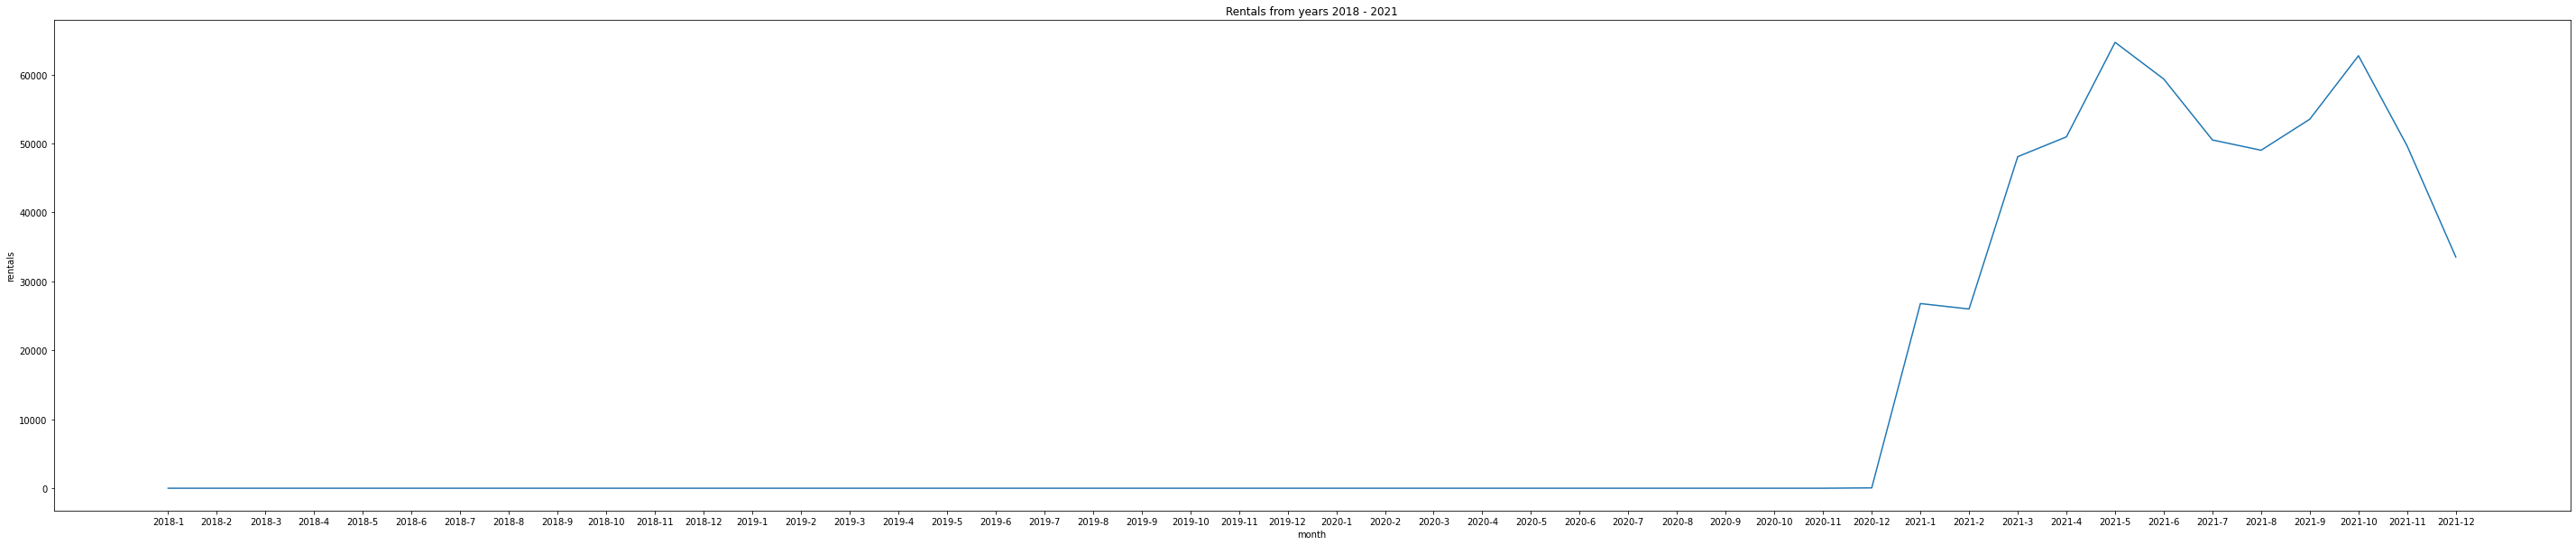

In [8]:
plot('1',tsdata)

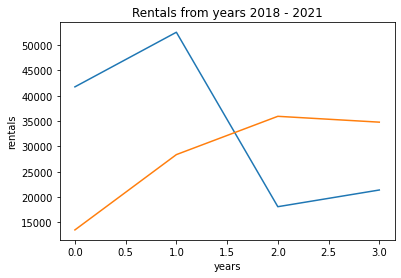

In [5]:
## TEST

from matplotlib import pyplot as plt

a = [41743,52523,18086,21382]
b = [13503,28369,35928,34774]

fig, ax = plt.subplots()
# plotting monthly data
ax.plot(a)
ax.plot(b)
ax.set_xlabel('years')
ax.set_ylabel('rentals')
labels = ['2018','2019','2020','2021']
#plt.xticks(tsdata.index, labels)
# show values
ax.set_title(f'Rentals from years 2018 - 2021')
plt.show()